In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import pyplot as plt
import os.path

In [3]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

In [4]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

C:\Users\USUARIO\anaconda3\envs\IDSA37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


# Generación de datos

In [5]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Selección del Dataset

Dos tipos de datasets:
- generate_gaussians_distributions: Generado con dos gaussianas
- generate_elipse_data: Generado con distribución uniforme en el cuadrado [-1, 1], [-1, 1] y recortando con una elipse en el centro

Descomentar/comentar las lineas correspondientes para seleccionar uno u otro dataset

In [6]:
X, y = generate_elipse_data()

# Problema 1: Graficamos

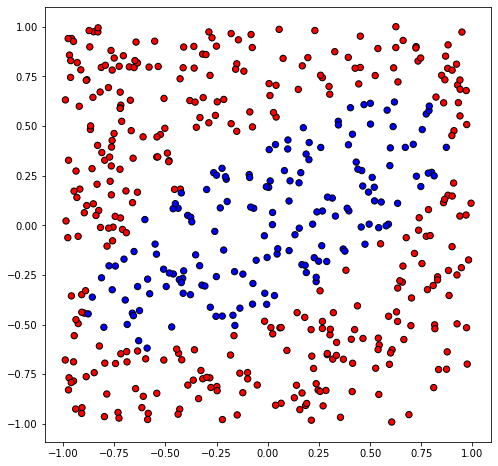

In [7]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

# Inicialización del modelo

Para Naive Bayes probar con: 
- priors=None, var_smoothing=1e-09 (Ambos datasets)
- priors=None, var_smoothing=0.2 (para generate_elipse_data) var_smoothing=1 (para generate_gaussians_distributions) 
- priors=[0.5, 0.5] (para generate_elipse_data) priors=[0.7, 0.3] (para generate_gaussians_distributions), var_smoothing=1e-09 

Para QDA:
- priors=None, reg_param=0.0, store_covariance=True (Ambos modelos)
- Cambio los parámetros como quiera y verifique si ocurre lo esperado

# Pregunta 7:
#### ¿Cuánto da el accuracy (score) para Naive Bayes? | priors=None, var_smoothing=1e-09

In [8]:
model = GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
# Entrenamiento del modelo
model.fit(X,y)

GaussianNB()

In [10]:
if type(model)==GaussianNB:
    print(model.classes_) 
    prior1, prior2 = model.class_prior_
    sigma1, sigma2 = model.sigma_
    mu1, mu2 = model.theta_

[0 1]


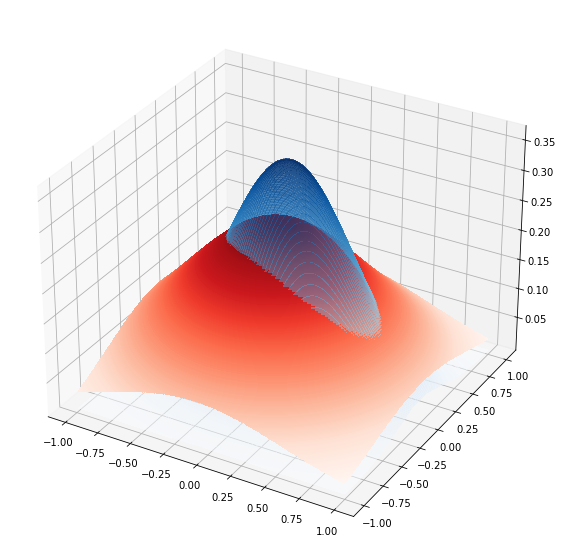

In [11]:
plot_gaussians(X, mu1, sigma1, mu2, sigma2, prior1, prior2)

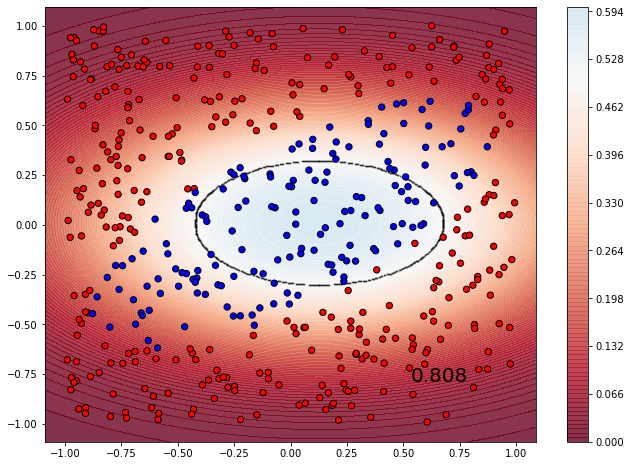

In [12]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

#### El accuracy (score) para Naive Bayes es 0.808

# Pregunta 1:
## De acuerdo a los sataset graficados podemos comprobar que las siguientes afirmaciones son correctas:
#### El dataset: generate_gaussians_distributions(), es linealmente separable
#### Es de esperar que QDA tenga una mejor performance en generate_elipse_data() que Naive Bayes
#### generate_elipse_data() genera datos uniformente distribuidos y asigna clase azul a aquellas observaciones que quedan dentro de una elipse.

# Pregunta 9:
#### Cambie el var_smoothing=0.2 en Naive Bayes.

In [13]:
# Instanciación de la clase
model = GaussianNB(priors=None, var_smoothing=0.2)
# Entrenamiento del modelo
model.fit(X,y)

GaussianNB(var_smoothing=0.2)

[0 1]


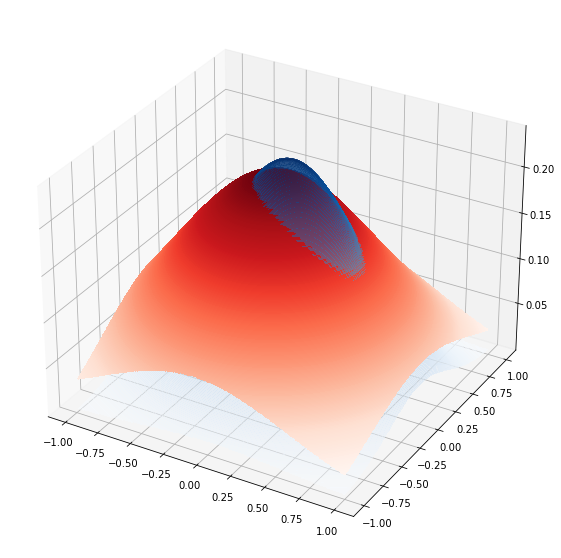

In [14]:
if type(model)==GaussianNB:
    print(model.classes_) 
    prior1, prior2 = model.class_prior_
    sigma1, sigma2 = model.sigma_
    mu1, mu2 = model.theta_

plot_gaussians(X, mu1, sigma1, mu2, sigma2, prior1, prior2)

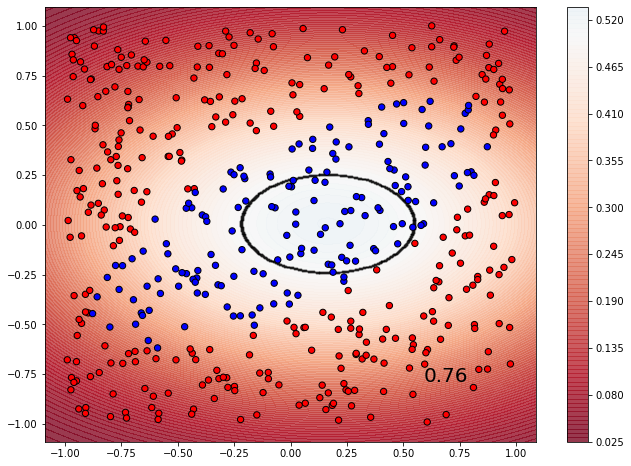

In [15]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

#### Se Puede observar comparándolo con el gráfico original, que con este nuevo smoothing, el modelo clasifica más puntos azules como si fueran rojos, o sea :

#### *La incidencia del var_smoothing se ve más en la distribución estimada de las azules
#### *El modelo nuevo clasifica más puntos como rojos cuando deberían ser azules

# Problema 10:
#### Verificar que en este caso, el dataset no esta balanceado.
#### Forzar ahora las priors a [0.5, 0.5]

In [16]:
# Verificamos si el dataset no esta balanceado:

In [17]:
model.class_prior_ # datasett NO Balanceado

array([0.682, 0.318])

In [18]:
# Instanciación de la clase
model = GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-09) # forzamos las priors
# Entrenamiento del modelo
model.fit(X,y)

GaussianNB(priors=[0.5, 0.5])

[0 1]


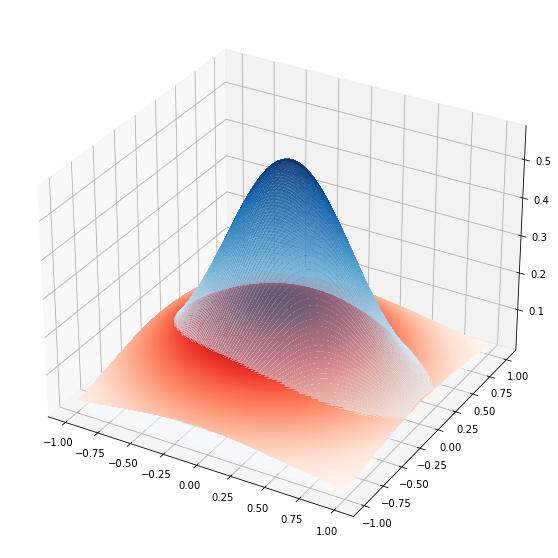

In [19]:
if type(model)==GaussianNB:
    print(model.classes_) 
    prior1, prior2 = model.class_prior_
    sigma1, sigma2 = model.sigma_
    mu1, mu2 = model.theta_

plot_gaussians(X, mu1, sigma1, mu2, sigma2, prior1, prior2)

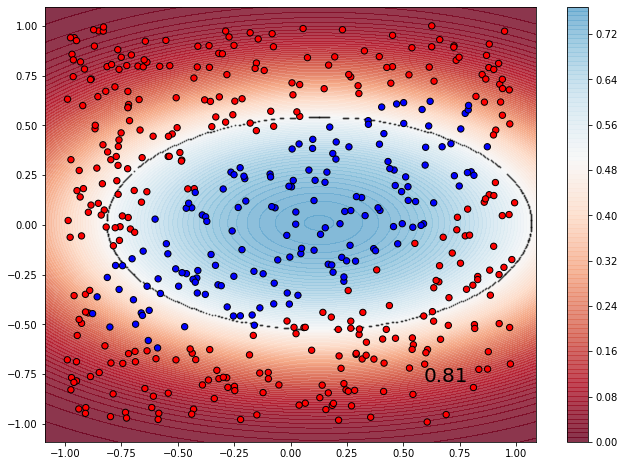

In [20]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

#### El nuevo modelo clasifica más puntos azules que el modelo anterior

#### El umbral de decisión no puede dar una elipse inclinada debido a Naive Bayes que asume independencia

# Pregunta 12:
#### ¿Cuantos parámetros aprendió el modelo de Naive Bayes?

#### Para GaussianNB:

#### 2*D*C

#### D= Dimensiones= 2 , C= Clases= 2

In [21]:
print(2*2*2)

8


#### 8 parámetros es la cantidad aprendida/estimada por GaussianNB